## Overall Data

In [2]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

# Load the Excel file
excel_file = '/content/drive/MyDrive/Fall 2024 Classes/Capstone: CV for Infant Lumbar Puncture/Data Files/shortaxis_binary v2.xlsx'

# Create an ExcelFile object
xls = pd.ExcelFile(excel_file)

# Get a list of sheet names
sheet_names = xls.sheet_names

# Display the sheet names
print(sheet_names)

Mounted at /content/drive
['SAMPLE NEW DATA SHEET', 'LPPILOTLAT1', 'LPPILOTLAT2', 'LPPILOTLAT3', 'LPPILOTSITTING2', 'LP SONO 001 POST FNL CONUS', 'LP SONO 001 POST FST CONUS', '01.09.31 hrs __0025097', '01.09.47 hrs __0025098', 'AM12 (Converted)', 'BM12 (Converted)', 'US00000L', 'XM12 (Converted)', 'YM12 (Converted)']


In [3]:
# Read all sheets into a dictionary of DataFrames
sheets_list = []
for i in tqdm(sheet_names[1:]):
  df_i = pd.read_excel(excel_file, sheet_name=i)
  cols = list(df_i.columns[:7])
  sheets_list.append(df_i[cols])

# Concatenate all the DataFrames from each sheet
combined_df = pd.concat(sheets_list, axis=0)

# Display the combined DataFrame
combined_df

100%|██████████| 13/13 [00:18<00:00,  1.44s/it]


,FILENAME,BAD QUALITY,CORD,FLUID,PARTIAL OBSTRUCTION,NO FLUID good quality,CONUS,Unnamed: 6
0,LPPILOTLAT1_0.jpg,1.0,0.0,0.0,0,0.0,0.0,NaN
1,LPPILOTLAT1_1.jpg,1.0,0.0,0.0,0,0.0,0.0,NaN
2,LPPILOTLAT1_2.jpg,1.0,0.0,0.0,0,0.0,0.0,NaN
3,LPPILOTLAT1_3.jpg,1.0,0.0,0.0,0,0.0,0.0,NaN
4,LPPILOTLAT1_4.jpg,1.0,0.0,0.0,0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
368,YM12_368.jpg,0.0,0.0,0.0,0,1.0,0.0,NaN
369,YM12_369.jpg,0.0,0.0,0.0,0,1.0,0.0,NaN
370,YM12_370.jpg,0.0,0.0,0.0,0,1.0,0.0,NaN
371,YM12_371.jpg,0.0,0.0,0.0,0,1.0,0.0,NaN


In [4]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3393 entries, 0 to 372
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FILENAME               3390 non-null   object 
 1   BAD QUALITY            3390 non-null   float64
 2   CORD                   3390 non-null   float64
 3   FLUID                  3390 non-null   float64
 4   PARTIAL OBSTRUCTION    3391 non-null   object 
 5   NO FLUID good quality  3323 non-null   float64
 6   CONUS                  3390 non-null   float64
 7   Unnamed: 6             0 non-null      float64
dtypes: float64(6), object(2)
memory usage: 238.6+ KB


In [10]:
import pandas as pd
import numpy as np

# Assume `column_names` is the list of columns you are interested in
# Example: column_names = ['BAD QUALITY', 'OTHER COLUMN', ...]

# Create an empty DataFrame to store the counts
column_names = list(combined_df.columns[1:])
counts_df = pd.DataFrame()

# Iterate over each column and count the occurrences of 0, 1, and NaN
for col in column_names:
    counts = combined_df[col].value_counts(dropna=False)

    # Create a DataFrame from the counts with index as [0, 1, NaN] and append it
    counts_df[col] = counts.reindex([0, 1, np.nan], fill_value=0)

# Fill NaN values with 0 (in the final counts DataFrame)
counts_df.fillna(0, inplace=True)

counts_df.rename_axis("Label", axis=0, inplace=True)

# Display the counts DataFrame
counts_df

,BAD QUALITY,CORD,FLUID,PARTIAL OBSTRUCTION,NO FLUID good quality,CONUS,Unnamed: 6
Label,,,,,,,
0.0,2872,2646,864,2874,3109,3200,0
1.0,518,744,2526,516,214,190,0
NaN,3,3,3,2,70,3,3393


In [15]:
# Select only the columns I want
selected_columns = counts_df[['BAD QUALITY', 'CORD', 'FLUID']].copy()

# Rename
selected_columns.rename(columns={'BAD QUALITY': 'Quality', 'CORD': 'Spinal Cord', 'FLUID': 'Spinal Fluid'}, inplace=True)

# Display
selected_columns

,Quality,Spinal Cord,Spinal Fluid
Label,,,
0.0,2872,2646,864
1.0,518,744,2526
NaN,3,3,3


In [16]:
# Normalize each column so that the sum is 100%
counts_df_normalized = selected_columns.div(selected_columns.sum(axis=0), axis=1) * 100

# Display the normalized DataFrame
counts_df_normalized

,Quality,Spinal Cord,Spinal Fluid
Label,,,
0.0,84.644857,77.984085,25.464191
1.0,15.266726,21.927498,74.447392
NaN,0.088417,0.088417,0.088417


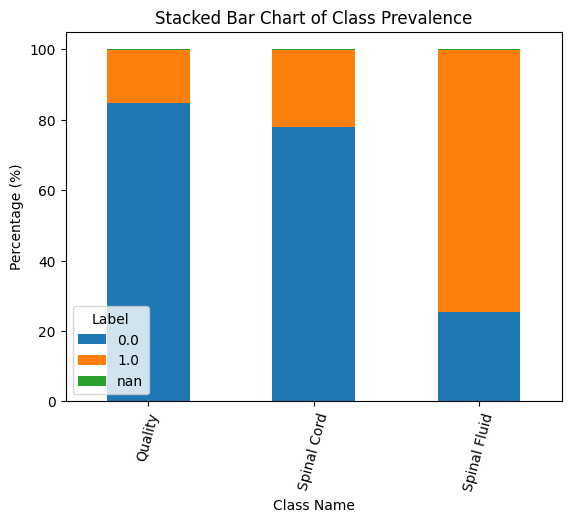

In [18]:
# Plot the stacked bar chart
counts_df_normalized.T.plot(kind='bar', stacked=True)

# Add labels and title
plt.title('Stacked Bar Chart of Class Prevalence')
plt.ylabel('Percentage (%)')
plt.xlabel('Class Name')
plt.xticks(rotation=75)

# Display the plot
plt.show()